# **Investigate Hotel Business using Data Visualization**

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.

### **Import Libraries and Settings**

In [1]:
# Import initial necessary libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Settings of dataframe display
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = None

# Version requirements
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.1
seaborn version :  0.13.2


#### Load Dataset (Jupyter Notebook)

In [2]:
df = pd.read_csv('hotel_bookings_data.csv')

#### Load Dataset (Google Colab)

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

# df = pd.read_csv('hotel_bookings_data.csv')

# **Task 1 : Data Cleansing/Preprocessing**

In [4]:
# Retrieve 15 sample lines from the available data
df.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
71473,City Hotel,1,24,2019,September,27,6,0,2,2,2.0,0,Breakfast,Kota Malang,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Personal,250.00,0,0,Canceled
27783,Resort Hotel,0,227,2018,October,36,28,4,10,2,0.0,0,Breakfast,Kota Malang,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,430.0,NaN,0,Personal,94.14,0,1,Check-Out
93594,City Hotel,0,226,2018,September,30,22,0,2,2,0.0,0,Breakfast,Kabupaten Sleman,Groups,TA/TO,0,0,0,0,No Deposit,1.0,NaN,96,Family,76.50,0,1,Check-Out
29190,Resort Hotel,0,244,2018,December,43,16,2,5,2,0.0,0,Dinner,Kota Batu,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,120.00,0,1,Check-Out
64328,City Hotel,1,4,2019,May,10,6,1,0,1,0.0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,83.0,NaN,0,Personal,78.40,0,0,Canceled
47919,City Hotel,1,52,2018,May,11,9,0,4,2,0.0,0,No Meal,Kabupaten Blora,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Personal,63.75,0,0,Canceled
22862,Resort Hotel,0,25,2018,June,15,4,1,4,2,0.0,0,Dinner,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,250.0,NaN,0,Personal,82.74,0,0,Check-Out
24471,Resort Hotel,0,4,2018,July,21,20,0,2,2,0.0,1,Dinner,Kota Denpasar,Online TA,TA/TO,0,0,0,1,No Deposit,240.0,NaN,0,Personal,142.00,1,1,Check-Out
30928,Resort Hotel,0,3,2018,February,50,5,1,3,1,0.0,0,Breakfast,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,146.0,NaN,0,Personal,32.00,0,0,Check-Out
88943,City Hotel,0,31,2018,July,20,13,0,2,2,0.0,0,Breakfast,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,16.0,NaN,0,Personal,105.30,0,0,Check-Out


## **Data Types Information**

In [5]:
# Viewing information available in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**Feature Information**

- `hotel`                          : Hotel (Resort Hotel or City Hotel)

- `is_canceled`                    : Value indicating if the booking was canceled (1) or not (0)

- `lead_time`                      : Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

- `arrival_date_year`              : Year of arrival date

- `arrival_date_month`             : Month of arrival date

- `arrival_date_week_number`       : Week number of year for arrival date

- `arrival_date_day_of_month`      : Day of arrival date

- `stays_in_weekend_nights`        : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

- `stays_in_weekdays_nights`       : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

- `adults`                         : Number of adults

- `children`                       : Number of children

- `babies`                         : Number of babies

- `meal`                           : Type of meal booked

- `city`                           : City of origin

- `market_segment`                 : Market segment designation. Context : the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

- `distribution_channel`           : Booking distribution channel. Context : the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

- `is_repeated_guest`              : Value indicating if the booking name was from a repeated guest (1) or not (0)

- `previous_cancellations`         : Number of previous bookings that were cancelled by the customer prior to the current booking

- `previous_bookings_not_canceled` : Number of previous bookings not cancelled by the customer prior to the current booking

- `booking_changes`                : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

- `deposit_type`                   : Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: 
    -   No Deposit – no deposit was made;
    -   Non Refund – a deposit was made in the value of the total stay cost;
    -   Refundable – a deposit was made with a value under the total cost of stay

- `agent`                          : ID of the travel agency that made the booking

- `company`                        : ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

- `days_in_waiting_list`           : Number of days the booking was in the waiting list before it was confirmed to the customer

- `customer_type`                  : Type of booking, assuming one of four categories:
    -   Contract - when the booking has an allotment or other type of contract associated to it;
    -   Group – when the booking is associated to a group;
    -   Transient – when the booking is not part of a group or contract, and is not associated to other transient booking
    -   Transient-party – when the booking is transient, but is associated to at least other transient booking

- `adr`                            : Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

- `required_car_parking_spaces`    : Number of car parking spaces required by the customer

- `total_of_special_requests`      : Number of special requests made by the customer (e.g. twin bed or high floor)

- `reservation_status`             : Reservation last status, assuming one of three categories:
    -   Canceled – booking was canceled by the customer;
    -   Check-Out – customer has checked in but already departed;
    -   No-Show – customer did not check-in and did inform the hotel of the reason why

## **Handling Missing Value**

In [6]:
# Check missing values
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

children     0.003350
city         0.408744
agent       13.686238
company     94.306893
dtype: float64


Text(0.5, 0, 'Percentage')

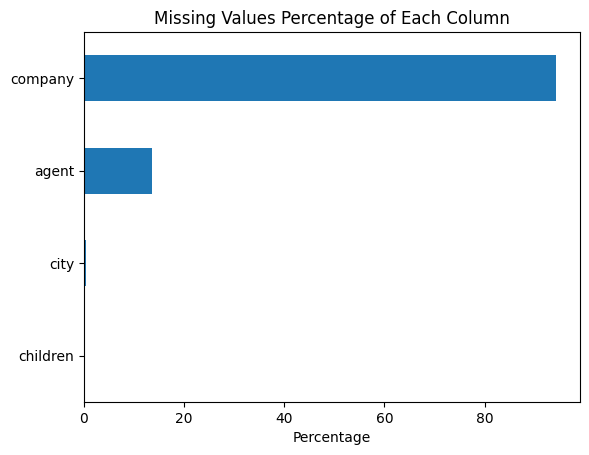

In [7]:
# Filter columns with missing values
missing_values = df.isna().sum() / df.shape[0] * 100
missing_values = missing_values[missing_values > 0]

print(missing_values)

missing_values.plot(kind='barh')
plt.title('Missing Values Percentage of Each Column')
plt.xlabel('Percentage')

In [8]:
# Analyze further for company column for proper action towards it
df[df['company'].notna()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
18,Resort Hotel,0,0,2017,September,27,1,0,1,2,0.0,0,Breakfast,Kota Yogyakarta,Corporate,Corporate,0,0,0,0,No Deposit,NaN,110.0,0,Personal,107.42,0,0,Check-Out
218,Resort Hotel,1,1,2017,September,28,8,0,1,2,0.0,0,Breakfast,Kota Denpasar,Corporate,Corporate,0,0,0,0,No Deposit,NaN,110.0,0,Personal,104.72,0,1,Canceled
219,Resort Hotel,1,1,2017,September,28,8,0,1,2,0.0,0,Breakfast,Kota Denpasar,Corporate,Corporate,0,0,0,0,No Deposit,NaN,110.0,0,Personal,104.72,0,1,Canceled
220,Resort Hotel,0,1,2017,September,28,8,0,2,2,0.0,0,Breakfast,Kabupaten Sumedang,Corporate,Corporate,0,0,0,0,No Deposit,NaN,110.0,0,Personal,104.72,1,1,Check-Out
295,Resort Hotel,0,84,2017,September,28,11,1,1,2,0.0,0,Dinner,Kota Denpasar,Corporate,Corporate,0,0,0,0,No Deposit,NaN,113.0,0,Personal,100.00,1,0,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119119,City Hotel,0,40,2019,October,35,29,0,1,1,0.0,0,Breakfast,Kota Denpasar,Corporate,Corporate,0,0,0,0,No Deposit,NaN,451.0,0,Personal,95.00,0,0,Check-Out
119122,City Hotel,0,40,2019,October,35,29,0,1,1,0.0,0,Breakfast,Kota Denpasar,Corporate,Corporate,0,0,0,0,No Deposit,NaN,451.0,0,Personal,95.00,0,0,Check-Out
119123,City Hotel,0,40,2019,October,35,29,0,1,1,0.0,0,Breakfast,Kota Denpasar,Corporate,Corporate,0,0,0,0,No Deposit,NaN,451.0,0,Personal,95.00,0,0,Check-Out
119124,City Hotel,0,0,2019,October,35,29,0,1,1,0.0,0,Breakfast,Kota Denpasar,Complementary,Corporate,0,0,0,0,No Deposit,NaN,72.0,0,Personal,0.00,0,2,Check-Out


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status


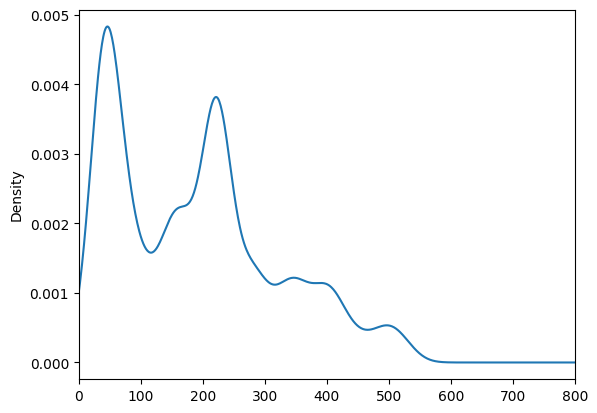

In [9]:
# Analyze further for company column for proper action towards it
df['company'].plot(kind='kde')
plt.xlim(0, 800)

# Checking for company ID of 0
df[df['company'] == 0.0]

> There is no company with the ID of 0, we could take this approach of imputing the number 0, indicating that no company is involved instead of dropping the entire column. We will do the same thing with `agent` since it are similar. While for the `children` we could fill with 0 (no children) and for the missing values in `city` we could impute it with the mode.

In [10]:
# Handling missing values

# Filling zero value in the company because no company is involved
df['company'] = df['company'].fillna(0)

# Filling zero value in the agent because no agent is involved
df['agent'] = df['agent'].fillna(0)

# Filling zero rating on children is probably because the customer has no children
df['children'] = df['children'].fillna(0)

# Filling the mode for missing city
df['city'] = df['city'].fillna(df['city'].mode()[0])

## **Handling Invalid Values**

In [11]:
# Identifying undefined (invalid) values in the entire dataframe
df[df.values == 'Undefined']

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
3106,Resort Hotel,0,105,2017,January,47,18,2,4,2,0.0,0,Undefined,Kota Batu,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,313.0,0.0,65,Family,69.0,0,0,Check-Out
3107,Resort Hotel,0,105,2017,January,47,18,2,4,2,0.0,0,Undefined,Kota Batu,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,313.0,0.0,65,Family,69.0,0,0,Check-Out
3108,Resort Hotel,0,105,2017,January,47,18,2,4,2,0.0,0,Undefined,Kota Batu,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,313.0,0.0,65,Family,69.0,0,0,Check-Out
3110,Resort Hotel,0,62,2017,January,47,18,2,4,2,0.0,0,Undefined,Kota Batu,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,313.0,0.0,0,Family,69.0,0,0,Check-Out
3111,Resort Hotel,0,105,2017,January,47,18,2,4,2,0.0,0,Undefined,Kota Batu,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,313.0,0.0,65,Family,69.0,0,0,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40600,City Hotel,1,2,2017,October,32,3,1,0,2,0.0,0,Breakfast,Kota Denpasar,Undefined,Undefined,0,0,0,0,No Deposit,0.0,0.0,0,Family,12.0,0,1,Canceled
40667,City Hotel,1,1,2017,October,32,5,0,2,2,0.0,0,Breakfast,Kota Denpasar,Direct,Undefined,0,0,0,0,No Deposit,14.0,0.0,0,Family,12.0,0,1,Canceled
40679,City Hotel,1,1,2017,October,32,5,0,2,3,0.0,0,Breakfast,Kota Denpasar,Undefined,Undefined,0,0,0,0,No Deposit,0.0,0.0,0,Family,18.0,0,2,Canceled
40679,City Hotel,1,1,2017,October,32,5,0,2,3,0.0,0,Breakfast,Kota Denpasar,Undefined,Undefined,0,0,0,0,No Deposit,0.0,0.0,0,Family,18.0,0,2,Canceled


In [12]:
# Identifying columns that have 'undefined' values
df.columns[(df == 'Undefined').any()]

Index(['meal', 'market_segment', 'distribution_channel'], dtype='object')

In [13]:
# Checking the amount of 'undefined' values in each columns
undefined = ['meal', 'market_segment', 'distribution_channel']

for col in undefined :
    print(df[col].value_counts())
    print()

meal
Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: count, dtype: int64

market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64

distribution_channel
TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: count, dtype: int64



> The column with the most undefined values is meal, which will be handled by converting it to 'No Meal' with the assumption that 'Undefined' means the customer did not order any meals in this context. As for 'undefined' in  market_segment and distribution_channel since the amount is very low we could handle it by converting it to the mode for that column or just drop those rows instead. While for the other column with undefined value we could just change it to the mode.

In [14]:
# Handling undefined values in the data

# Replace 'Undefined' with 'No Meal'
df['meal'] = df['meal'].replace('Undefined', 'No Meal')

# Replace 'Undefined' with 'Online TA'
df['market_segment'] = df['market_segment'].replace('Undefined', 'Online TA')

# Replace 'Undefined' with 'TA/TO'
df['distribution_channel'] = df['distribution_channel'].replace('Undefined', 'TA/TO')

## **Handling Duplicate Rows**

In [15]:
# Check duplicated values
df.duplicated().sum()

33282

In [16]:
df[df.duplicated()].sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
92485,City Hotel,0,131,2018,September,28,4,1,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,2,No Deposit,9.0,0.0,0,Family,105.3,0,1,Check-Out
62916,City Hotel,1,61,2019,March,4,25,0,2,2,0.0,0,Breakfast,Kota Denpasar,Groups,TA/TO,0,0,0,0,Non Refund,326.0,0.0,0,Personal,80.0,0,0,Canceled
54956,City Hotel,1,4,2018,October,32,1,1,1,2,0.0,0,No Meal,Kota Malang,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0.0,0,Personal,109.0,0,0,Canceled
8775,Resort Hotel,0,364,2018,December,42,12,1,4,2,0.0,0,Breakfast,Kabupaten Bangka,Groups,Corporate,0,0,0,3,No Deposit,0.0,223.0,0,Family,66.0,0,0,Check-Out
77544,City Hotel,1,20,2017,November,40,29,0,1,1,0.0,0,Breakfast,Kota Denpasar,Groups,TA/TO,0,1,0,0,Non Refund,1.0,0.0,0,Personal,250.0,0,0,Canceled


**Important Note About Using df.duplicated**

The code you provided `df[df.duplicated()]` will return rows in the DataFrame `df` that are duplicates. However, it may not give you the full picture depending on your data and requirements.

Here's a breakdown of what it does:

- `df.duplicated()`: This method returns a boolean mask indicating duplicate rows in the DataFrame. If a row is a duplicate of a previous row, it will be marked as `True` in the resulting Series, otherwise `False`.
- `df[df.duplicated()]`: This filters the DataFrame to only include rows where the corresponding value in the boolean mask is `True`, thus showing only the duplicated rows.

However, it's important to note a few things:

1. By default, `duplicated()` considers all columns when identifying duplicates. If you want to consider only a subset of columns, you can specify the `subset` parameter.

2. This method only checks for exact duplicates. If you want to identify rows that are duplicates based on specific columns or criteria, you may need to use additional parameters like `subset` or `keep`.

3. Depending on your data, you might want to inspect the duplicated rows more thoroughly to decide how to handle them. You may choose to remove them, keep only the first occurrence, or apply some other logic.

So, while `df[df.duplicated()]` is a valid way to identify duplicated rows in a DataFrame, it's important to consider the specifics of your data and your objectives for identifying duplicates.

> In this case, we will not drop the duplicate rows since the information we have for making that decision is limited due to not having the unique identifier that we can rely on like customer ID or order ID; and also it could be a coincidence that the booking parameters are the same for some customers like their arrival_date_day_of_month is the same, etc. 

> Data type of some columns need to be corrected :
- 1. children : float64 --> int64
- 2. company : float64 --> int64
- 3. agent : float64 --> int64

In [17]:
# Changing data types of some columns
df['children'] = df['children'].astype('int64')
df['agent'] = df['agent'].astype('int64')
df['company'] = df['company'].astype('int64')

## **Transform and Filter Data**

We will drop some unnecessary data.

In [18]:
print(f'Number of Rows Before Transformation = {df.shape[0]} rows')

# Number of Guest (combined of adults, children, and babies in 1 booking)
df['total_guests'] = df['adults'] + df['children'] + df['babies']

print(f'Number of Guest = {df[df['total_guests'] <= 0].shape[0]} rows')

# Total stay duration (weekend + weekdays)
df['stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']
print(f'Duration of Stay = {df[df['stay_duration'] <= 0].shape[0]} rows')

# Negative values in ADR (Average Daily Rate)
print(f'Negative values in ADR (Average Daily Rate) = {df[df['adr'] < 0].shape[0]} rows')

# Filter the final data
df_final = df[(df['total_guests'] > 0) & 
              (df['stay_duration'] > 0) &
              ~(df['adr'] < 0)]

print(f'Number of Rows After Transformation = {df_final.shape[0]} rows')

Number of Rows Before Transformation = 119390 rows
Number of Guest = 180 rows
Duration of Stay = 715 rows
Negative values in ADR (Average Daily Rate) = 1 rows
Number of Rows After Transformation = 118564 rows


## **Division by Type of Data**

In [19]:
df_final.sample(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,stay_duration
54506,City Hotel,1,31,2018,September,30,18,1,3,3,0,0,Dinner,Kota Yogyakarta,Online TA,TA/TO,0,0,0,0,No Deposit,9,0,0,Personal,210.6,0,1,Canceled,3,4
110646,City Hotel,0,26,2019,June,17,27,0,3,2,0,0,No Meal,Kota Malang,Online TA,TA/TO,0,0,0,0,No Deposit,9,0,0,Personal,115.0,0,2,Check-Out,2,3
3718,Resort Hotel,1,161,2017,February,53,31,0,2,2,1,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,0,Personal,148.1,0,1,Canceled,3,2


**List of Column Types:**

- **Categorical** (14 Columns) : 
    - `hotel`- Nominal - City Hotel & Resort Hotel
    - `arrival_date_year` - Ordinal - 2017, 2018, 2019
    - `arrival_date_month` - Ordinal - January untill December
    - `meal` - Nominal - Breakfast, Dinner, Full Board, No Meal
    - `city` - Nominal - e.g. Kabupaten Aceh Jaya, Kabupaten Bandung, Kabupaten Bandung Barat, Kabupaten Bangka, Kabupaten Bangkalan, Kabupaten Banjar, Kabupaten Banjarnegara, Kabupaten Bantul, Kabupaten Banyumas, Kabupaten Banyuwangi, .....
    - `market_segment` - Nominal - Aviation, Complementary, Corporate, Direct, Groups, Offline TA/TO, Online TA, Undefined
    - `distribution_channel` - Nominal - Corporate, Direct, GDS, TA/TO, Undefined
    - `deposit_type` - Nominal - No Deposit, Non Refund, Refundable
    - `agent` & `company` - Nominal - ID
    - `customer_type` - Nominal - Bussiness, Contract, Family, Personal
    - `reservation_status` -  Nominal - Canceled, Check-Out, No-Show
    - `is_canceled` & `is_repeated_guest` - Nominal (Binary 0 & 1)

- **Numerical** (17 Columns):
    - `lead_time` - Continuous
    - `arrival_date_week_number` - Discrete 
    - `arrival_date_day_of_month` - Discrete
    - `stays_in_weekend_nights` - Discrete
    - `stays_in_weekdays_nights` - Discrete
    - `adults` - Discrete
    - `children` - Discrete
    - `babies` - Discrete
    - `previous_cancellations` - Continuous
    - `previous_bookings_not_canceled` - Continuous
    - `booking_changes` - Continuous
    - `days_in_waiting_list` - Discrete
    - `adr` - Continuous
    - `required_car_parking_spaces` - Continuous
    - `total_of_special_requests` - Discrete
    - `total_guests` - Discrete
    - `stay_duration` - Discrete

# **Statistical Summary**

In [20]:
nums = ['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights',
            'stays_in_weekdays_nights', 'adults', 'children', 'babies',
            'previous_cancellations', 'previous_bookings_not_canceled',
            'booking_changes', 'days_in_waiting_list', 'adr',
            'required_car_parking_spaces', 'total_of_special_requests',
            'total_guests', 'stay_duration']

cats = ['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month', 'meal',
            'city', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'deposit_type',
            'agent', 'company', 'customer_type', 'reservation_status']

In [21]:
# Describe numerical columns
df[nums].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_weekdays_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119390.0,0.103886,0.398555,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0
previous_cancellations,119390.0,0.087118,0.844336,0.00,0.00,0.000,0.0,26.0
previous_bookings_not_canceled,119390.0,0.137097,1.497437,0.00,0.00,0.000,0.0,72.0


In [22]:
# Describe categorical columns
df[cats].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.0,0.0,0.0,1.0,1.0
arrival_date_year,119390.0,2018.156554,0.707476,2017.0,2018.0,2018.0,2019.0,2019.0
is_repeated_guest,119390.0,0.031912,0.175767,0.0,0.0,0.0,0.0,1.0
agent,119390.0,74.828319,107.141953,0.0,7.0,9.0,152.0,535.0
company,119390.0,10.775157,53.943884,0.0,0.0,0.0,0.0,543.0


In [23]:
# Checking unique values for each categorical columns
for col in df[cats]:
    print()
    print(f"{col}: {df[col].unique()}")


hotel: ['Resort Hotel' 'City Hotel']

is_canceled: [0 1]

arrival_date_year: [2017 2018 2019]

arrival_date_month: ['September' 'October' 'November' 'December' 'January' 'February' 'March'
 'April' 'May' 'June' 'July' 'August']

meal: ['Breakfast' 'Full Board' 'Dinner' 'No Meal']

city: ['Kota Denpasar' 'Kabupaten Bangka' 'Kabupaten Sleman' 'Kota Batu'
 'Kota Malang' 'Kota Yogyakarta' 'Kabupaten Tangerang' 'Kota Semarang'
 'Kota Serang' 'Kota Tangerang' 'Kota Bogor' 'Kabupaten Bandung'
 'Kabupaten Magelang' 'Kabupaten Sumedang' 'Kota Jakarta Timur'
 'Kabupaten Purwakarta' 'Kabupaten Kepulauan Seribu' 'Kabupaten Belitung'
 'Kota Jakarta Pusat' 'Kota Jakarta Selatan' 'Kota Surabaya'
 'Kota Jakarta Utara' 'Kota Gorontalo' 'Kota Jambi' 'Kota Jakarta Barat'
 'Kota Bengkulu' 'Kabupaten Bandung Barat' 'Kabupaten Bekasi'
 'Kabupaten Bogor' 'Kabupaten Ciamis' 'Kabupaten Cianjur'
 'Kabupaten Cirebon' 'Kota Cimahi' 'Kabupaten Indramayu'
 'Kabupaten Karawang' 'Kabupaten Kuningan' 'Kabupaten Majal

# **Task 2 : Monthly Hotel Booking Analysis Based On Hotel Type**

In [24]:
df_task_2 = df_final.copy()
df_task_2.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,stay_duration
33494,Resort Hotel,0,22,2019,April,8,23,0,2,2,0,0,No Meal,Kota Batu,Groups,TA/TO,0,0,0,0,No Deposit,68,0,0,Family,60.0,0,1,Check-Out,2,2
42275,City Hotel,1,63,2017,November,36,4,0,2,2,0,0,Dinner,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,21,0,0,Family,116.0,0,0,Canceled,2,2
112840,City Hotel,0,6,2019,July,22,28,1,0,1,0,0,Breakfast,Kota Denpasar,Complementary,Direct,0,0,0,0,No Deposit,0,45,0,Personal,0.0,0,0,Check-Out,1,1
67031,City Hotel,1,111,2019,June,17,27,1,3,2,0,0,Breakfast,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,0,Non Refund,31,0,0,Personal,120.0,0,0,Canceled,2,4
3781,Resort Hotel,1,62,2018,March,2,4,1,4,2,0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,0,Personal,61.2,0,1,Canceled,2,5


In [25]:
df_task_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118564 entries, 2 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118564 non-null  object 
 1   is_canceled                     118564 non-null  int64  
 2   lead_time                       118564 non-null  int64  
 3   arrival_date_year               118564 non-null  int64  
 4   arrival_date_month              118564 non-null  object 
 5   arrival_date_week_number        118564 non-null  int64  
 6   arrival_date_day_of_month       118564 non-null  int64  
 7   stays_in_weekend_nights         118564 non-null  int64  
 8   stays_in_weekdays_nights        118564 non-null  int64  
 9   adults                          118564 non-null  int64  
 10  children                        118564 non-null  int64  
 11  babies                          118564 non-null  int64  
 12  meal                 

In [26]:
df_task_2['arrival_date_num_month'] = pd.to_datetime(df_task_2['arrival_date_month'], format='%B').dt.month

In [27]:
df_booking_monthly = df_task_2.groupby(['hotel', 'arrival_date_month', 'arrival_date_num_month', 'arrival_date_year']).agg({'hotel' : 'count'}).rename(columns={'hotel' : 'total_booking'}).reset_index()

df_booking_monthly.sort_values(by=['hotel', 'arrival_date_num_month', 'arrival_date_year'], inplace=True)

df_booking_monthly.drop(columns=['arrival_date_num_month'], inplace=True)

df_booking_monthly.set_index(['hotel', 'arrival_date_month', 'arrival_date_year'])

total_booking
hotel        arrival_date_month arrival_date_year               
City Hotel   January            2017                        1225
                                2018                        3084
             February           2017                        1637
                                2018                        2460
             March              2018                        1355
                                2019                        2357
             April              2018                        2347
                                2019                        2570
             May                2018                        3028
                                2019                        3383
             June               2018                        3549
                                2019                        3909
             July               2018                        3640
                                2019                        4544
             August             2018                        3914
                                2019                        3960
             September          2017                        1393
                                2018                        3107
                                2019                        3554
             October            2017                        2471
                                2018                        3362
                                2019                        3119
             November           2017                        3516
                                2018                        3861
             December           2017                        3368
                                2018                        4186
Resort Hotel January            2017                        1088
                                2018                        1315
             February           2017                        1239
                                2018                        1353
             March              2018                         866
                                2019                        1293
             April              2018                        1509
                                2019                        1572
             May                2018                        1754
                                2019                        1550
             June               2018                        1848
                                2019                        1739
             July               2018                        1773
                                2019                        1747
             August             2018                        1345
                                2019                        1672
             September          2017                        1361
                                2018                        1427
                                2019                        1744
             October            2017                        1392
                                2018                        1672
                                2019                        1796
             November           2017                        1582
                                2018                        1518
             December           2017                        1548
                                2018                        1962

In [28]:
df_task_2

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,stay_duration,arrival_date_num_month
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0,0,0,Personal,75.00,0,0,Check-Out,1,1,9
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304,0,0,Personal,75.00,0,0,Check-Out,1,1,9
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,0,Personal,98.00,0,1,Check-Out,2,2,9
5,Resort Hotel,0,14,2017,September,27,1,0,2,2,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,0,Personal,98.00,0,1,Check-Out,2,2,9
6,Resort Hotel,0,0,2017,September,27,1,0,2,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,0,0,0,Personal,107.00,0,0,Check-Out,2,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2019,October,35,30,2,5,2,0,0,Breakfast,Kabupaten Magelang,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,394,0,0,Personal,96.14,0,0,Check-Out,2,7,10
119386,City Hotel,0,102,2019,October,35,31,2,5,3,0,0,Breakfast,Kota Yogyakarta,Online TA,TA/TO,0,0,0,0,No Deposit,9,0,0,Personal,225.43,0,2,Check-Out,3,7,10
119387,City Hotel,0,34,2019,October,35,31,2,5,2,0,0,Breakfast,Kabupaten Bandung,Online TA,TA/TO,0,0,0,0,No Deposit,9,0,0,Personal,157.71,0,4,Check-Out,2,7,10
119388,City Hotel,0,109,2019,October,35,31,2,5,2,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,89,0,0,Personal,104.40,0,0,Check-Out,2,7,10


In [29]:
df_normalized = df_task_2.groupby(['hotel', 'arrival_date_month', 'arrival_date_num_month']).agg({'arrival_date_year' : ['nunique', 'count']}).reset_index()
df_normalized.columns = ['hotel_type', 'arrival_date_month', 'arrival_date_num_month', 'num_year', 'total_booking']

df_normalized

,hotel_type,arrival_date_month,arrival_date_num_month,num_year,total_booking
0,City Hotel,April,4,2,4917
1,City Hotel,August,8,2,7874
2,City Hotel,December,12,2,7554
3,City Hotel,February,2,2,4097
4,City Hotel,January,1,2,4309
5,City Hotel,July,7,2,8184
6,City Hotel,June,6,2,7458
7,City Hotel,March,3,2,3712
8,City Hotel,May,5,2,6411
9,City Hotel,November,11,2,7377


In [30]:
df_normalized[df_normalized['num_year'] != 2]

,hotel_type,arrival_date_month,arrival_date_num_month,num_year,total_booking
10,City Hotel,October,10,3,8952
11,City Hotel,September,9,3,8054
22,Resort Hotel,October,10,3,4860
23,Resort Hotel,September,9,3,4532


We need to normalize the data since the month of september and october data from year 2017-2019 while the other only have 2017 and 2018.

In [31]:
df_normalized['average_booking'] = round(df_normalized['total_booking'] / df_normalized['num_year'])
df_normalized

,hotel_type,arrival_date_month,arrival_date_num_month,num_year,total_booking,average_booking
0,City Hotel,April,4,2,4917,2458.0
1,City Hotel,August,8,2,7874,3937.0
2,City Hotel,December,12,2,7554,3777.0
3,City Hotel,February,2,2,4097,2048.0
4,City Hotel,January,1,2,4309,2154.0
5,City Hotel,July,7,2,8184,4092.0
6,City Hotel,June,6,2,7458,3729.0
7,City Hotel,March,3,2,3712,1856.0
8,City Hotel,May,5,2,6411,3206.0
9,City Hotel,November,11,2,7377,3688.0


In [32]:
df_normalized_total = df_normalized.groupby('hotel_type').agg({'average_booking':'sum'})
df_normalized_total.rename(columns={'average_booking':'total_average_booking'}, inplace=True)
df_normalized_total

,total_average_booking
hotel_type,
City Hotel,36614.0
Resort Hotel,18268.0


In [33]:
df_normalized = df_normalized.merge(df_normalized_total, on='hotel_type')

In [34]:
df_normalized['percentage'] = round((df_normalized['average_booking']/df_normalized['total_average_booking'])*100, 2)
df_normalized

,hotel_type,arrival_date_month,arrival_date_num_month,num_year,total_booking,average_booking,total_average_booking,percentage
0,City Hotel,April,4,2,4917,2458.0,36614.0,6.71
1,City Hotel,August,8,2,7874,3937.0,36614.0,10.75
2,City Hotel,December,12,2,7554,3777.0,36614.0,10.32
3,City Hotel,February,2,2,4097,2048.0,36614.0,5.59
4,City Hotel,January,1,2,4309,2154.0,36614.0,5.88
5,City Hotel,July,7,2,8184,4092.0,36614.0,11.18
6,City Hotel,June,6,2,7458,3729.0,36614.0,10.18
7,City Hotel,March,3,2,3712,1856.0,36614.0,5.07
8,City Hotel,May,5,2,6411,3206.0,36614.0,8.76
9,City Hotel,November,11,2,7377,3688.0,36614.0,10.07


In [35]:
df_normalized.sort_values(by=['hotel_type', 'arrival_date_num_month'], inplace=True)

month_sorter = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
                'August', 'September', 'October', 'November', 'December']

df_normalized['arrival_date_month'] = pd.Categorical(df_normalized['arrival_date_month'],
                                                     categories=month_sorter,
                                                     ordered=True)

df_normalized[['average_booking', 'total_average_booking']] = df_normalized[['average_booking', 'total_average_booking']].astype(int)

df_normalized.reset_index(drop=True, inplace=True)
df_normalized

,hotel_type,arrival_date_month,arrival_date_num_month,num_year,total_booking,average_booking,total_average_booking,percentage
0,City Hotel,January,1,2,4309,2154,36614,5.88
1,City Hotel,February,2,2,4097,2048,36614,5.59
2,City Hotel,March,3,2,3712,1856,36614,5.07
3,City Hotel,April,4,2,4917,2458,36614,6.71
4,City Hotel,May,5,2,6411,3206,36614,8.76
5,City Hotel,June,6,2,7458,3729,36614,10.18
6,City Hotel,July,7,2,8184,4092,36614,11.18
7,City Hotel,August,8,2,7874,3937,36614,10.75
8,City Hotel,September,9,3,8054,2685,36614,7.33
9,City Hotel,October,10,3,8952,2984,36614,8.15


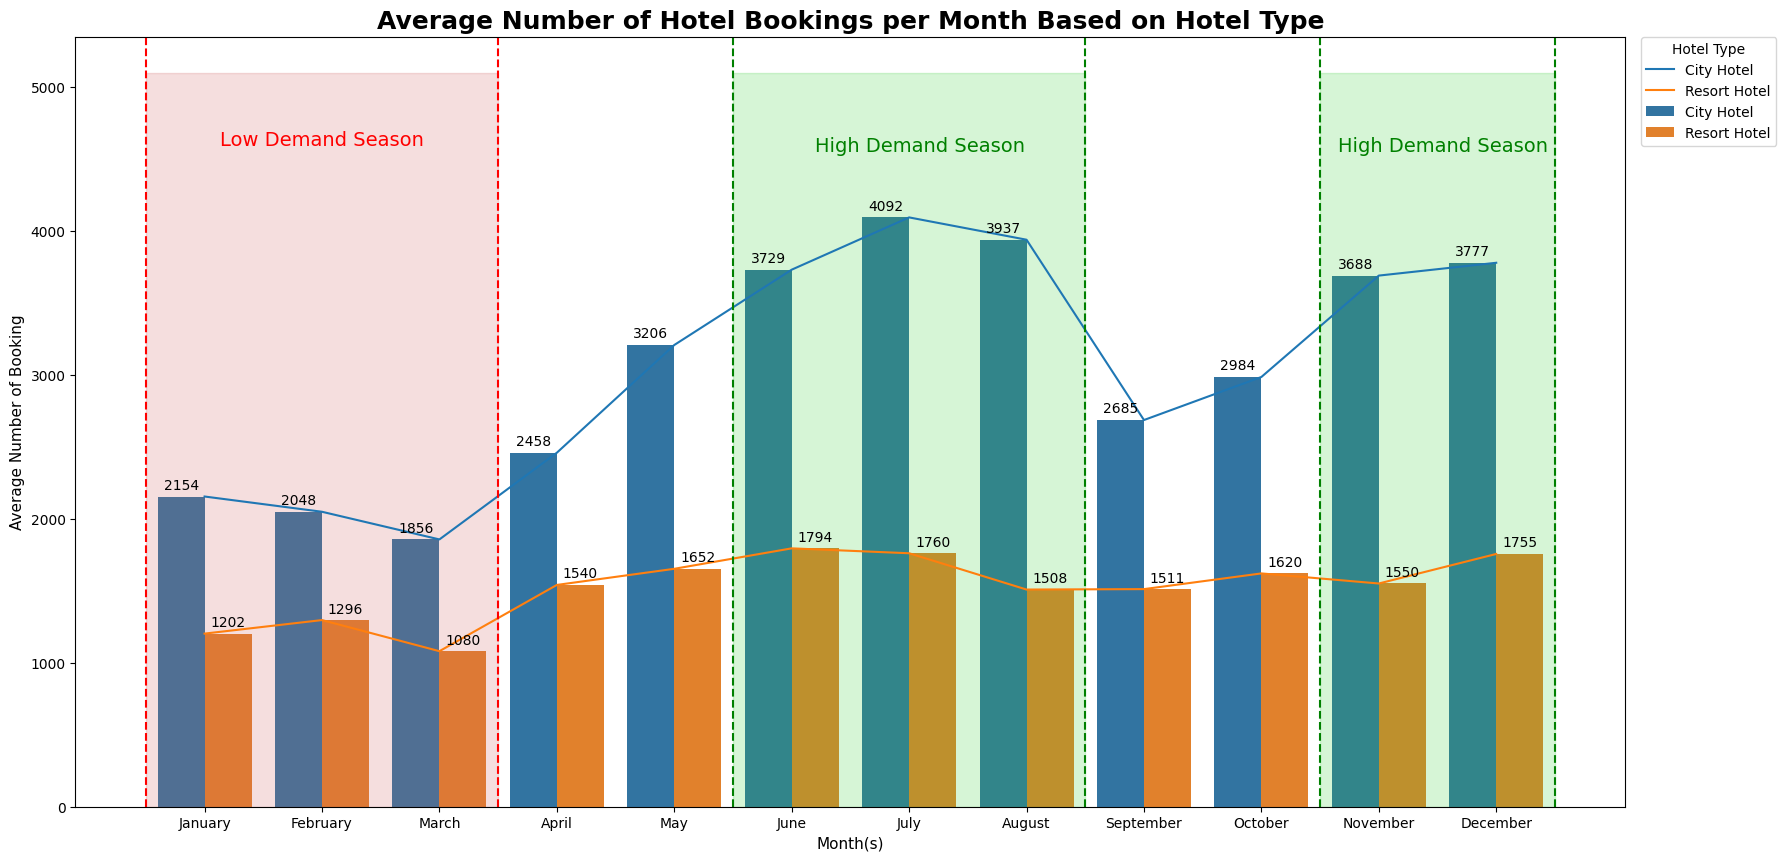

<Figure size 640x480 with 0 Axes>

In [36]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.lineplot(data=df_normalized, x='arrival_date_month', y='average_booking', hue='hotel_type', ci=False)
sns.barplot(data=df_normalized, x='arrival_date_month', y='average_booking', hue='hotel_type')

plt.bar_label(ax.containers[0], padding=3)
plt.bar_label(ax.containers[1], padding=3)

booking_max_point = max(df_normalized['average_booking'])

plt.axvline(-0.5, ls='--', color='red')
plt.axvline(2.5, ls='--', color='red')
plt.stackplot(np.arange(-0.5, 3.5), booking_max_point+1000, color='indianred', alpha=0.2)
plt.text(x=1, y=booking_max_point+500, s='Low Demand Season', fontsize=14, color='red', ha='center')

plt.axvline(4.5, ls='--', color='green')
plt.axvline(7.5, ls='--', color='green')
plt.stackplot(np.arange(4.5, 8.5), booking_max_point+1000, color='limegreen', alpha=0.2)
plt.text(x=5.2, y=booking_max_point+500, s='High Demand Season', fontsize=14, color='green', va='center')

plt.axvline(9.5, ls='--', color='green')
plt.axvline(11.5, ls='--', color='green')
plt.stackplot(np.arange(9.5, 12.5), booking_max_point+1000, color='limegreen', alpha=0.2)
plt.text(x=9.65, y=booking_max_point+500, s='High Demand Season', fontsize=14, color='green', va='center')

plt.title("Average Number of Hotel Bookings per Month Based on Hotel Type", fontsize=18, color='black', weight='bold')
plt.xlabel('Month(s)', fontsize=11)
plt.ylabel('Average Number of Booking', fontsize=11)
plt.legend(title="Hotel Type",
           bbox_to_anchor=(1.01, 1), 
           loc='best', 
           borderaxespad=0)
plt.show()
plt.tight_layout()

## **Data Interpretation and Business Recommendation**

- Both types of hotels experience similar trends of increase and decrease, with a more significant increase in City Hotels, which overall have a higher number of bookings compared to resort hotels in Indonesia.

- It can be seen that the peak increase in hotel bookings occurs around June-August and November-December, which may be due to the fasting month holidays in 2017-2018 (according to data collection) and end-of-semester/year holidays for the entire Indonesian population. To address this increase, hotels can implement several strategies including:

    - Plan targeted marketing campaigns leading up to these peak periods. Highlight offers and packages suitable for families during school breaks and special deals for those observing Ramadan.

    - Create tailored packages that cater to different segments of customers, such as families, couples, and solo travelers. Offer special discounts or perks for longer stays during peak periods.

    - Anticipate higher demand during peak seasons and ensure adequate staffing levels to maintain high-quality service. Consider offering additional amenities or services to enhance the guest experience.

    - Encourage early bookings by offering discounts or exclusive deals for customers who book their stays well in advance. This can help in managing demand and securing reservations ahead of time.

- The decrease in hotel bookings occurs in the early months of the year, January-March, and also in September-October, with a noticeable decrease in City Hotels. This may be related to the resumption of activities for students and workers. The main actions that can be taken by hotel businesses during this period include:

    - Develop enticing weekend getaway packages to attract local residents looking for short escapes during these slower periods. Offer special rates, complimentary meals, or leisure activities to entice weekend travelers.

    - Forge partnerships with local businesses and corporations to secure corporate bookings during off-peak periods. Offer discounted rates or corporate loyalty programs to incentivize companies to choose hotel for their accommodation needs.

# **Task 3 : Impact Analysis Of Stay Duration On Hotel Bookings Cancellation Rates**

New column related to stay duration already created in the data preparation process, that is `stay_duration` column which is total `stays_in_weekend_nights` + `stays_in_weekdays_nights`

In [37]:
df_task_3 = df_final.copy()
df_task_3.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,stay_duration
97548,City Hotel,0,57,2018,November,38,16,0,2,1,0,0,Dinner,Kabupaten Kepulauan Seribu,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,3,0,0,Family,91.00,0,0,Check-Out,1,2
68239,City Hotel,1,164,2019,July,20,15,1,2,1,0,0,Breakfast,Kota Denpasar,Groups,TA/TO,0,0,0,0,Non Refund,0,0,0,Personal,160.00,0,0,Canceled,1,3
38631,Resort Hotel,0,167,2019,September,29,19,2,4,2,0,0,Dinner,Kabupaten Bangka,Offline TA/TO,TA/TO,0,0,0,2,No Deposit,143,0,0,Personal,134.85,0,0,Check-Out,2,6
7861,Resort Hotel,1,269,2018,October,36,30,0,5,3,0,0,Dinner,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,242,0,0,Personal,201.80,0,1,Canceled,3,5
20872,Resort Hotel,0,2,2018,April,7,11,0,2,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,1,No Deposit,250,0,0,Personal,55.00,1,0,Check-Out,2,2


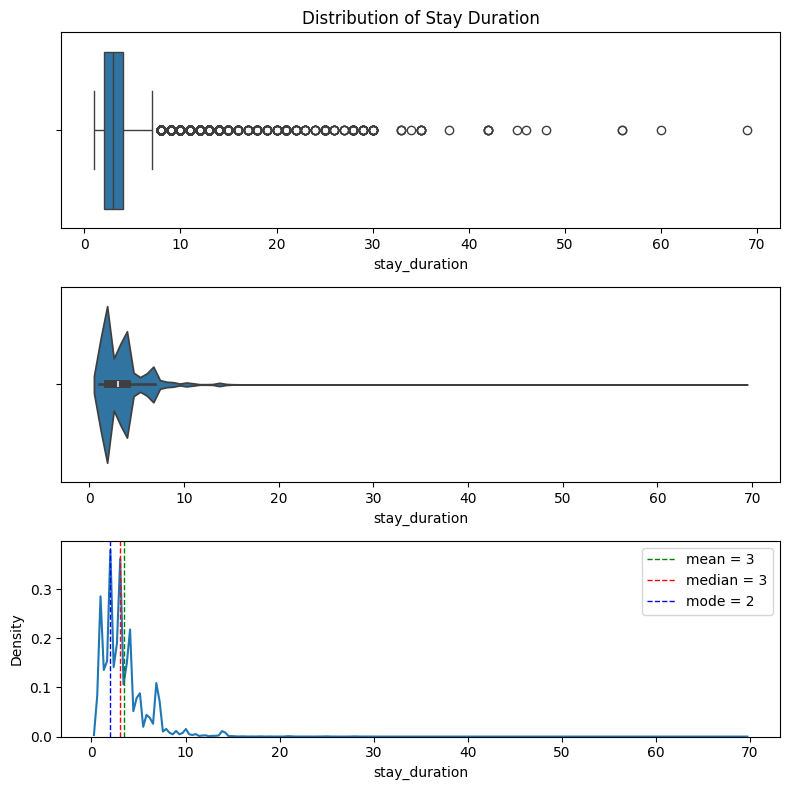

In [67]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8,8))

stay_dist = df_task_3['stay_duration']

box = sns.boxplot(data=df_task_3, x='stay_duration', ax=ax[0])

vio = sns.violinplot(data=df_task_3, x='stay_duration', ax=ax[1])

kde = sns.kdeplot(data=df_task_3, x='stay_duration', ax=ax[2])

mean = round(stay_dist.mean(), 2)
median = stay_dist.median()
mode = stay_dist.mode()[0]

measurements = [mean, median, mode]
names = ['mean', 'median', 'mode']
colors = ['green', 'red', 'blue']

for measurement, name, color in zip(measurements, names, colors):
        kde.axvline(x=measurement, linestyle="--", linewidth=1, label="{} = {:,.0f}".format(name, measurement), c=color)

box.set_title('Distribution of Stay Duration')
kde.legend()
plt.tight_layout()
plt.show()

As we can see that, the data is positively skewed or it means that customer mostly only have small stay duration. As for the outliers or customer with high number of stay duration we will perform grouping.

In [39]:
# Stay duration grouping

def stay_duration_grouping(x) :
    if x <= 7 :
        return '<= 1 week'
    elif x <= 14 :
        return '2 weeks'
    elif x <= 21 :
        return '3 weeks'
    else :
        return '>= 4 weeks'

df_task_3['stay_duration_group'] = df_task_3['stay_duration'].apply(stay_duration_grouping)

In [40]:
df_task_3['stay_duration_group'].value_counts()

stay_duration_group
<= 1 week     113339
2 weeks         4796
3 weeks          274
>= 4 weeks       155
Name: count, dtype: int64

In [41]:
df_task_3.sample(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,stay_duration,stay_duration_group
103295,City Hotel,0,26,2018,February,51,14,0,4,2,0,0,Breakfast,Kota Jakarta Barat,Online TA,TA/TO,0,0,0,0,No Deposit,9,0,0,Personal,88.4,0,1,Check-Out,2,4,<= 1 week
78173,City Hotel,0,224,2017,December,40,2,1,2,2,0,0,Breakfast,Kota Yogyakarta,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,3,0,0,Family,65.0,0,0,Check-Out,2,3,<= 1 week
29876,Resort Hotel,0,57,2018,December,44,25,4,10,2,0,0,Breakfast,Kota Yogyakarta,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,69,0,0,Personal,34.0,0,0,Check-Out,2,14,2 weeks


In [42]:
# Create aggregate table that compares the number of canceled hotel bookings based on the duration of stay for each hotel type, focusing on the proportion of canceled bookings

df_stay_cancel = df_task_3.groupby(['hotel', 'stay_duration_group', 'is_canceled']) \
                        .agg({'hotel' : 'count'}) \
                        .rename(columns={'hotel' : 'num_booking'}) \
                        .reset_index()

df_stay_cancel

,hotel,stay_duration_group,is_canceled,num_booking
0,City Hotel,2 weeks,0,511
1,City Hotel,2 weeks,1,558
2,City Hotel,3 weeks,0,29
3,City Hotel,3 weeks,1,76
4,City Hotel,<= 1 week,0,45287
5,City Hotel,<= 1 week,1,32391
6,City Hotel,>= 4 weeks,0,6
7,City Hotel,>= 4 weeks,1,41
8,Resort Hotel,2 weeks,0,2649
9,Resort Hotel,2 weeks,1,1078


In [43]:
df_stay_cancel_total = df_stay_cancel.groupby(['hotel', 'stay_duration_group']) \
                        .agg({'num_booking' : 'sum'}) \
                        .rename(columns={'num_booking' : 'total_booking'}) \
                        .reset_index()

df_stay_cancel_total

,hotel,stay_duration_group,total_booking
0,City Hotel,2 weeks,1069
1,City Hotel,3 weeks,105
2,City Hotel,<= 1 week,77678
3,City Hotel,>= 4 weeks,47
4,Resort Hotel,2 weeks,3727
5,Resort Hotel,3 weeks,169
6,Resort Hotel,<= 1 week,35661
7,Resort Hotel,>= 4 weeks,108


In [44]:
# Merge both number of booking and total booking dataframe together
df_stay_cancel = df_stay_cancel.merge(df_stay_cancel_total, on=['hotel', 'stay_duration_group'])

In [45]:
# Create new column of cancellation ratio
df_stay_cancel['cancellation_ratio'] = round((df_stay_cancel['num_booking'] / df_stay_cancel['total_booking'] * 100), 2)
df_stay_cancel

# Making sorter for stay_duration_group
stay_group_sorter = ['<= 1 week', '2 weeks', '3 weeks', '>= 4 weeks']

df_stay_cancel['stay_duration_group'] = pd.Categorical(df_stay_cancel['stay_duration_group'],
                                                     categories=stay_group_sorter,
                                                     ordered=True)

In [46]:
# Finalize dataframe by sorting and filtering only cancelled booking
df_stay_cancel.sort_values(by='stay_duration_group', inplace=True)
df_stay_cancel.reset_index(drop=True, inplace=True)
df_stay_cancel.rename(columns={'hotel' : 'hotel_type'}, inplace=True)

df_stay_cancel_filtered = df_stay_cancel[df_stay_cancel['is_canceled'] == 1]
df_stay_cancel_filtered

,hotel_type,stay_duration_group,is_canceled,num_booking,total_booking,cancellation_ratio
1,City Hotel,<= 1 week,1,32391,77678,41.70
3,Resort Hotel,<= 1 week,1,9907,35661,27.78
5,City Hotel,2 weeks,1,558,1069,52.20
7,Resort Hotel,2 weeks,1,1078,3727,28.92
9,City Hotel,3 weeks,1,76,105,72.38
11,Resort Hotel,3 weeks,1,79,169,46.75
13,City Hotel,>= 4 weeks,1,41,47,87.23
15,Resort Hotel,>= 4 weeks,1,46,108,42.59


Now that we have the final dataframe we wil now proceed to the visualization process of hotel cancellation rate by stay duration and hotel type

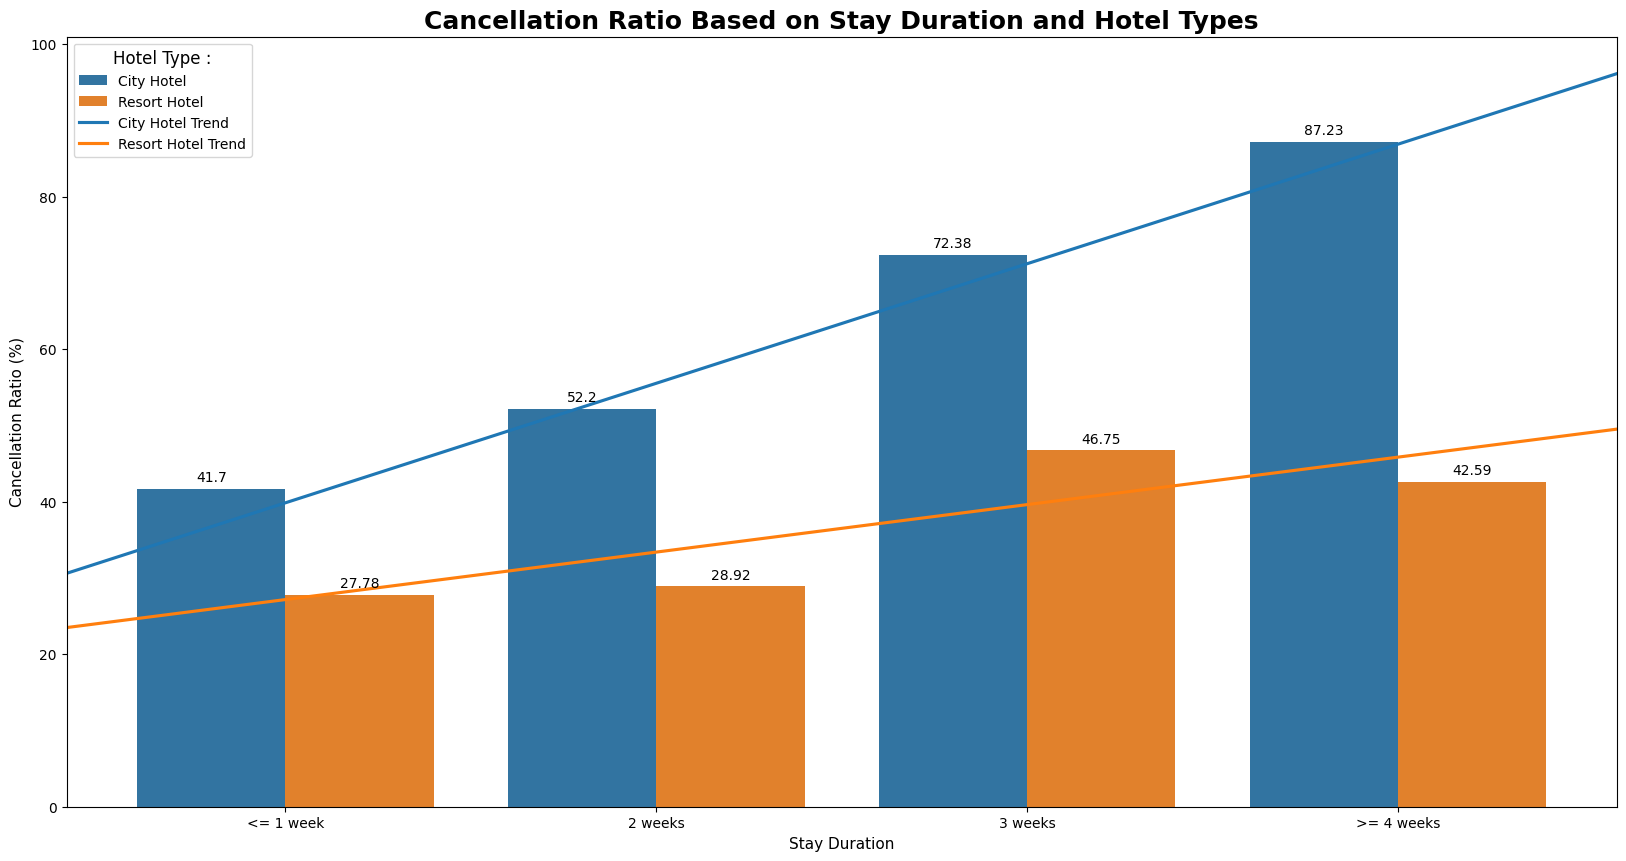

<Figure size 640x480 with 0 Axes>

In [47]:
# Create visualizatiton
fig, ax = plt.subplots(figsize=(20, 10))

city_hotel = df_stay_cancel_filtered[df_stay_cancel_filtered['hotel_type'] == 'City Hotel']
resort_hotel = df_stay_cancel_filtered[df_stay_cancel_filtered['hotel_type'] == 'Resort Hotel']

sns.barplot(data=df_stay_cancel_filtered, x='stay_duration_group', y='cancellation_ratio', hue='hotel_type')
# sns.lineplot(data=df_stay_cancel_filtered, x='stay_duration_group', y='cancellation_ratio', hue='hotel_type', ci=False)

sns.regplot(data=city_hotel, x=np.arange(0, len(city_hotel)), y='cancellation_ratio', scatter=False, label = 'City Hotel Trend', truncate=False, ci=False)

sns.regplot(data=resort_hotel, x=np.arange(0, len(resort_hotel)), y='cancellation_ratio', scatter=False, label = 'Resort Hotel Trend', truncate=False, ci=False)

plt.bar_label(ax.containers[0], padding=3)
plt.bar_label(ax.containers[1], padding=3)

plt.title("Cancellation Ratio Based on Stay Duration and Hotel Types", fontsize=18, color='black', weight='bold')
plt.xlabel('Stay Duration', fontsize=11)
plt.ylabel('Cancellation Ratio (%)', fontsize=11)
plt.legend(title='Hotel Type :', title_fontsize=12, prop={'size':10})

plt.show()
plt.tight_layout()

## **Data Interpretation and Business Recommendation**

- The City Hotel has a higher total number of cancellations compared to the resort hotel overall, and with a more significant increasing trend.
    - This suggests potential issues with customer satisfaction, booking management, or other factors specific to the City Hotel. To address this, the City Hotel management should focus on improving customer service, refining booking policies, and possibly implementing strategies to reduce cancellations, such as offering flexible booking options or enhancing the overall guest experience.

- There is a positive correlation between stay duration and cancellation rate, indicating that the longer customers stay, both in City and Resort Hotels, the higher the cancellation rate.
    - This could be due to various reasons such as changes in travel plans, dissatisfaction with the hotel experience, or unforeseen circumstances. To mitigate this, both City and Resort Hotels can implement measures to incentivize longer stays, enhance the overall guest experience to minimize cancellations, and provide flexible cancellation policies to accommodate changing plans.

# **Task 4 : Impact Analysis Of Lead Time On Hotel Bookings Cancellation Rate**

As for task 4 the process will pretty much the same with stay duration analysis, but this time we will be analyzing lead time column.

In [48]:
df_task_4 = df_final.copy()
df_task_4.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,stay_duration
71477,City Hotel,1,252,2019,September,27,6,0,3,2,0,0,No Meal,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,9,0,0,Personal,89.1,0,1,Canceled,2,3
79336,City Hotel,0,3,2017,December,43,22,0,3,2,0,0,No Meal,Kabupaten Sleman,Online TA,TA/TO,0,0,0,0,No Deposit,9,0,0,Contract,114.0,0,1,Check-Out,2,3
116175,City Hotel,0,79,2019,September,28,12,0,4,2,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,9,0,0,Personal,150.0,0,1,Check-Out,2,4
23361,Resort Hotel,0,70,2018,June,17,22,0,2,2,0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,1,No Deposit,250,0,0,Personal,61.2,0,0,Check-Out,2,2
41702,City Hotel,1,138,2017,October,34,22,2,1,2,0,0,Dinner,Kabupaten Kepulauan Seribu,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,17,0,0,Family,94.5,0,0,Canceled,2,3


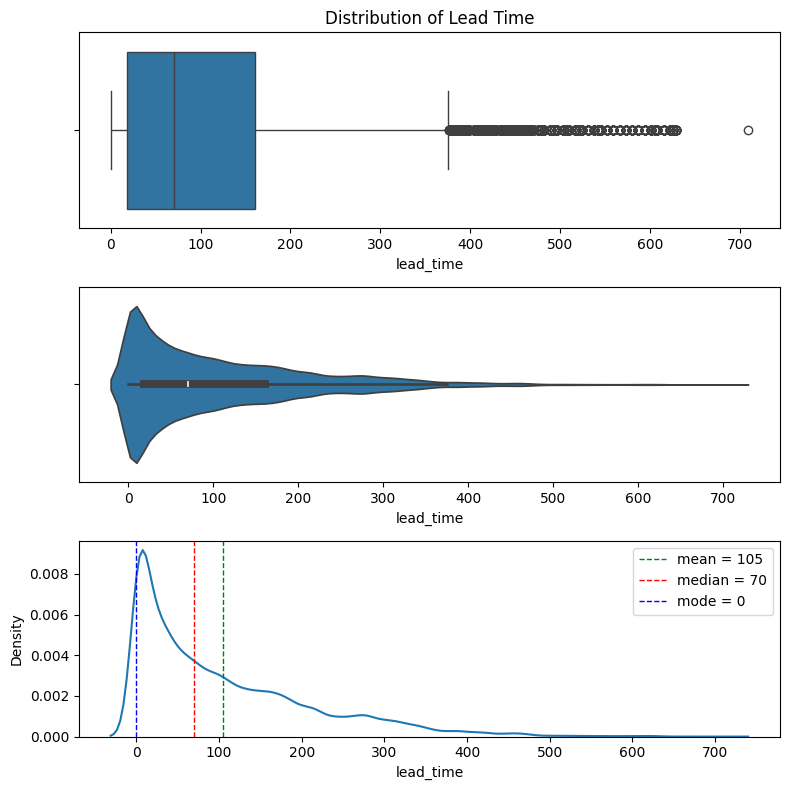

In [66]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8,8))

lead_dist = df_task_4['lead_time']

box = sns.boxplot(data=df_task_4, x='lead_time', ax=ax[0])

vio = sns.violinplot(data=df_task_4, x='lead_time', ax=ax[1])

kde = sns.kdeplot(data=df_task_4, x='lead_time', ax=ax[2])

mean = round(lead_dist.mean(), 2)
median = lead_dist.median()
mode = lead_dist.mode()[0]

measurements = [mean, median, mode]
names = ['mean', 'median', 'mode']
colors = ['green', 'red', 'blue']

for measurement, name, color in zip(measurements, names, colors):
        kde.axvline(x=measurement, linestyle="--", linewidth=1, label="{} = {:,.0f}".format(name, measurement), c=color)

box.set_title('Distribution of Lead Time')
kde.legend()
plt.tight_layout()
plt.show()

In [96]:
lead_dist.describe()

count    118564.000000
mean        104.505069
std         106.915647
min           0.000000
25%          18.000000
50%          70.000000
75%         161.000000
max         709.000000
Name: lead_time, dtype: float64

Based on the distribution we will group the lead time (which is in days) into months grouping with the interval of 3 months

In [83]:
# Lead time grouping

def lead_time_grouping(x) :
    if x <= 30 :
        return '<= 1 Month'
    elif x <= 120 :
        return '2-4 Months'
    elif x <= 210 :
        return '5-7 Months'
    elif x <= 300 :
        return '8-10 Months'
    elif x <= 390 :
        return '11-13 Months'
    else :
        return '>= 14 Months'

df_task_4['lead_time_group'] = df_task_4['lead_time'].apply(lead_time_grouping)

<Axes: xlabel='lead_time_group'>

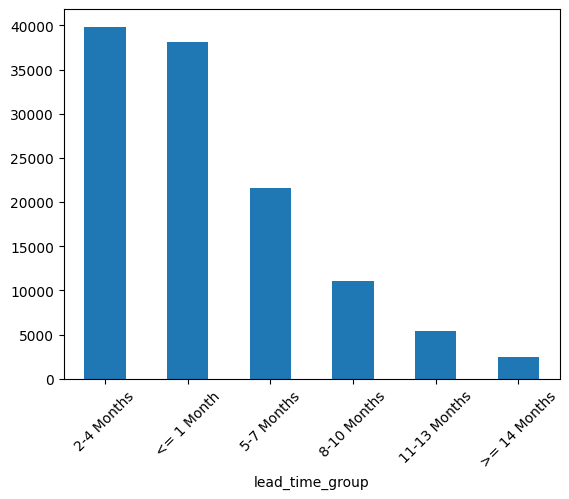

In [84]:
df_task_4['lead_time_group'].value_counts().plot(kind='bar', rot=45)

In [85]:
df_task_4.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,stay_duration,lead_time_group
58506,City Hotel,1,461,2018,December,42,13,0,2,2,0,0,Breakfast,Kota Denpasar,Groups,TA/TO,0,0,0,0,Non Refund,1,0,0,Personal,62.0,0,0,Canceled,2,2,>= 14 Months
54369,City Hotel,1,372,2018,September,29,14,0,2,2,0,0,Breakfast,Kota Denpasar,Groups,TA/TO,0,0,0,0,Non Refund,1,0,0,Personal,62.0,0,0,Canceled,2,2,11-13 Months
38493,Resort Hotel,0,32,2019,September,29,20,0,1,2,0,0,Breakfast,Kabupaten Sleman,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,0,Personal,190.0,0,1,Check-Out,2,1,2-4 Months
54352,City Hotel,1,372,2018,September,29,14,0,2,2,0,0,Breakfast,Kota Denpasar,Groups,TA/TO,0,0,0,0,Non Refund,1,0,0,Personal,62.0,0,0,Canceled,2,2,11-13 Months
21154,Resort Hotel,0,42,2018,April,8,16,0,4,2,0,0,Breakfast,Kabupaten Bangka,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,115,0,0,Personal,28.1,0,0,Check-Out,2,4,2-4 Months


In [86]:
# Create aggregate table that compares the number of canceled hotel bookings based on the lead time for each hotel type, focusing on the proportion of canceled bookings

df_lead_cancel = df_task_4.groupby(['hotel', 'lead_time_group', 'is_canceled']) \
                        .agg({'hotel' : 'count'}) \
                        .rename(columns={'hotel' : 'num_booking'}) \
                        .reset_index()

df_lead_cancel

,hotel,lead_time_group,is_canceled,num_booking
0,City Hotel,11-13 Months,0,884
1,City Hotel,11-13 Months,1,3056
2,City Hotel,2-4 Months,0,16406
3,City Hotel,2-4 Months,1,11783
4,City Hotel,5-7 Months,0,7298
5,City Hotel,5-7 Months,1,7051
6,City Hotel,8-10 Months,0,2760
7,City Hotel,8-10 Months,1,4376
8,City Hotel,<= 1 Month,0,17848
9,City Hotel,<= 1 Month,1,5174


In [87]:
df_lead_cancel_total = df_lead_cancel.groupby(['hotel', 'lead_time_group']) \
                        .agg({'num_booking' : 'sum'}) \
                        .rename(columns={'num_booking' : 'total_booking'}) \
                        .reset_index()

df_lead_cancel_total

,hotel,lead_time_group,total_booking
0,City Hotel,11-13 Months,3940
1,City Hotel,2-4 Months,28189
2,City Hotel,5-7 Months,14349
3,City Hotel,8-10 Months,7136
4,City Hotel,<= 1 Month,23022
5,City Hotel,>= 14 Months,2263
6,Resort Hotel,11-13 Months,1480
7,Resort Hotel,2-4 Months,11662
8,Resort Hotel,5-7 Months,7269
9,Resort Hotel,8-10 Months,3986


In [88]:
df_lead_cancel = df_lead_cancel.merge(df_lead_cancel_total, on=['hotel', 'lead_time_group'])

In [92]:
# Create new column of cancellation ratio
df_lead_cancel['cancellation_ratio'] = round((df_lead_cancel['num_booking'] / df_lead_cancel['total_booking'] * 100), 2)
df_lead_cancel

# Making sorter for stay_duration_group
lead_group_sorter = ['<= 1 Month', '2-4 Months', '5-7 Months', '8-10 Months', '11-13 Months', '>= 14 Months']

df_lead_cancel['lead_time_group'] = pd.Categorical(df_lead_cancel['lead_time_group'],
                                                     categories=lead_group_sorter,
                                                     ordered=True)

In [94]:
# Finalize dataframe by sorting and filtering only cancelled booking
df_lead_cancel.sort_values(by='lead_time_group', inplace=True)
df_lead_cancel.reset_index(drop=True, inplace=True)
df_lead_cancel.rename(columns={'hotel' : 'hotel_type'}, inplace=True)

df_lead_cancel_filtered = df_lead_cancel[df_lead_cancel['is_canceled'] == 1]
df_lead_cancel_filtered

,hotel_type,lead_time_group,is_canceled,num_booking,total_booking,cancellation_ratio
0,City Hotel,<= 1 Month,1,5174,23022,22.47
2,Resort Hotel,<= 1 Month,1,1976,15072,13.11
5,City Hotel,2-4 Months,1,11783,28189,41.80
6,Resort Hotel,2-4 Months,1,3999,11662,34.29
8,Resort Hotel,5-7 Months,1,2685,7269,36.94
10,City Hotel,5-7 Months,1,7051,14349,49.14
12,Resort Hotel,8-10 Months,1,1723,3986,43.23
14,City Hotel,8-10 Months,1,4376,7136,61.32
16,Resort Hotel,11-13 Months,1,609,1480,41.15
17,City Hotel,11-13 Months,1,3056,3940,77.56


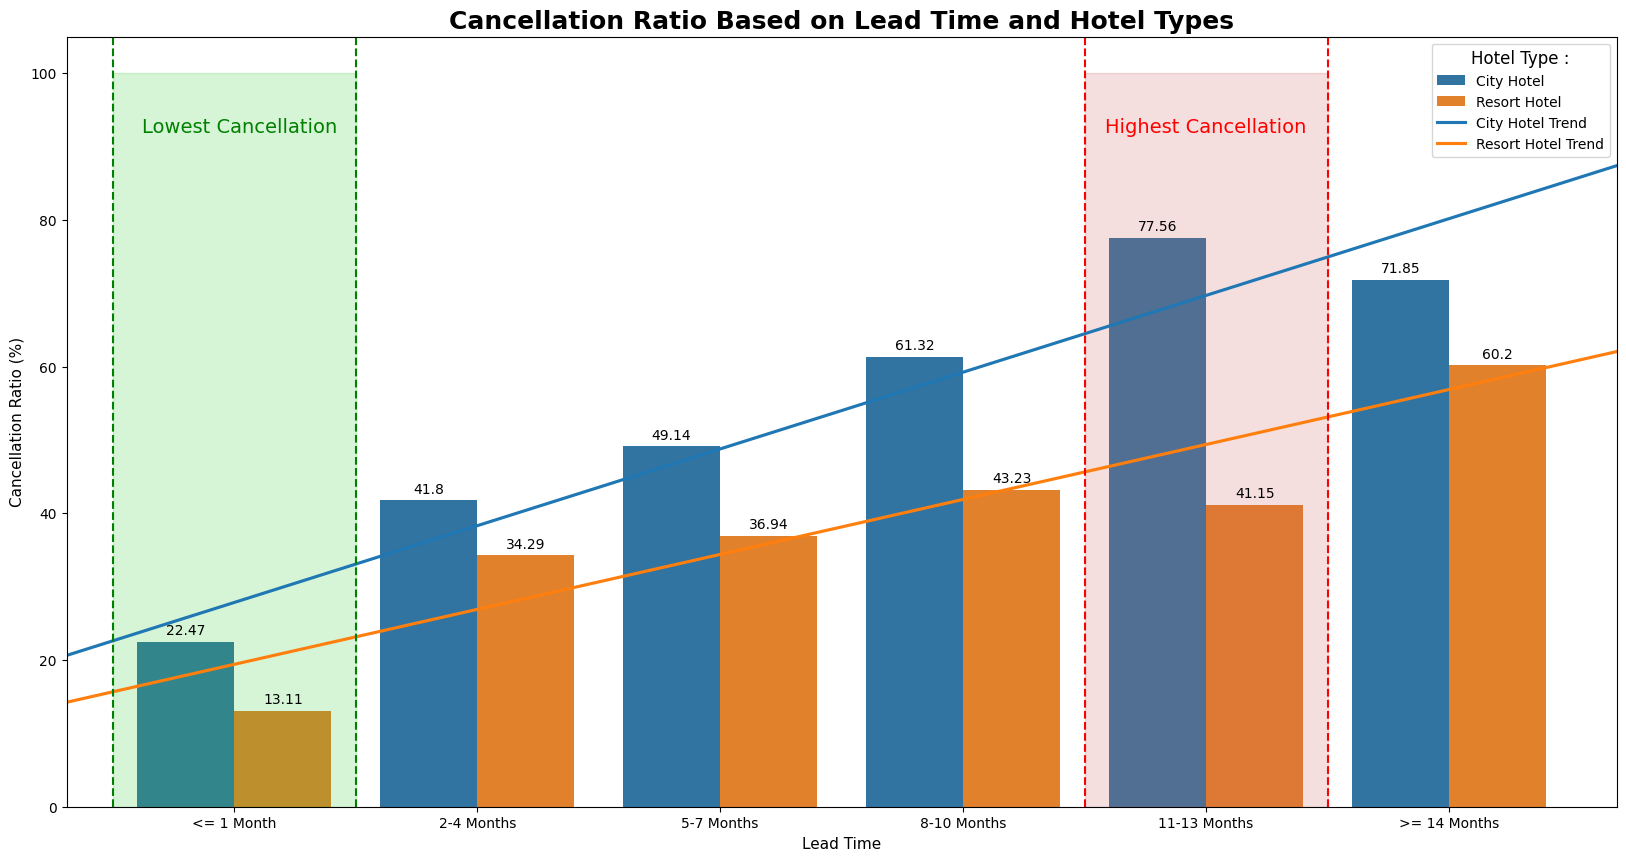

<Figure size 640x480 with 0 Axes>

In [102]:
# Create visualizatiton
fig, ax = plt.subplots(figsize=(20, 10))

city_hotel = df_lead_cancel_filtered[df_lead_cancel_filtered['hotel_type'] == 'City Hotel']
resort_hotel = df_lead_cancel_filtered[df_lead_cancel_filtered['hotel_type'] == 'Resort Hotel']

sns.barplot(data=df_lead_cancel_filtered, x='lead_time_group', y='cancellation_ratio', hue='hotel_type')
# sns.lineplot(data=df_lead_cancel_filtered, x='lead_time_group', y='cancellation_ratio', hue='hotel_type', ci=False)

sns.regplot(data=city_hotel, x=np.arange(0, len(city_hotel)), y='cancellation_ratio', scatter=False, label = 'City Hotel Trend', truncate=False, ci=False)
sns.regplot(data=resort_hotel, x=np.arange(0, len(resort_hotel)), y='cancellation_ratio', scatter=False, label = 'Resort Hotel Trend', truncate=False, ci=False)

plt.bar_label(ax.containers[0], padding=3)
plt.bar_label(ax.containers[1], padding=3)

plt.axvline(-0.5, ls='--', color='green')
plt.axvline(0.5, ls='--', color='green')
plt.stackplot(np.arange(-0.5,1.5), 100, color='limegreen', alpha=0.2)
plt.text(x=0.02, y=92, s='Lowest Cancellation', fontsize=14, color='green', ha='center')

plt.axvline(3.5, ls='--', color='red')
plt.axvline(4.5, ls='--', color='red')
plt.stackplot(np.arange(3.5,5.5), 100, color='indianred', alpha=0.2)
plt.text(x=4, y=92, s='Highest Cancellation', fontsize=14, color='red', ha='center')

plt.title("Cancellation Ratio Based on Lead Time and Hotel Types", fontsize=18, color='black', weight='bold')
plt.xlabel('Lead Time', fontsize=11)
plt.ylabel('Cancellation Ratio (%)', fontsize=11)
plt.legend(title='Hotel Type :', title_fontsize=12, prop={'size':10})

plt.show()
plt.tight_layout()

## **Data Interpretation and Business Recommendation**

- In general, it can be said that both City Hotel and Resort Hotel types have a trend where the longer the lead time, the higher the risk that the customer will cancel their reservation. Both hotel types have the lowest cancellation rate for lead times of <= 1 month, with City Hotel at 22.47% and Resort Hotel at 13.11%. This suggests that customers who book within a shorter time frame before their intended stay are more committed to their reservations and less likely to cancel. Meanwhile, the highest cancellation rate is observed for lead times of 11-13 months, with City Hotel at 77.56% and Resort Hotel at 41.15%. This implies that customers who book significantly far in advance are more prone to canceling their reservations, indicating potential uncertainty or changes in plans over longer periods.

- There are two business recommendation that we can apply based on these insights :

    - First we can implement dynamic pricing strategies based on lead time and historical cancellation patterns. Offer discounted rates or incentives for customers booking with shorter lead times to encourage immediate bookings and reduce cancellation risks. Conversely, for reservations with longer lead times, consider implementing stricter cancellation policies or requiring deposits to mitigate the potential revenue loss from cancellations.

    - Second we can develop targeted marketing campaigns to different types of customer with different lead time preferences. As for customers who frequently book with short lead time, we could promote exclusive offers and last-minute deals, emphasizing the benefits of spontaneous travel and instant savings. For customers with longer lead times, focus on highlighting the value of early booking advantages such as guaranteed availability and peace of mind.